G2M Case Study:

XYZ is a private equity firm in US. Due to remarkable growth in the Cab Industry in last few years and
multiple key players in the market, it is planning for an investment in Cab industry.

Objective : Provide actionable insights to help XYZ firm in identifying the right company for making
investment.

The analysis has been divided into four parts:

Data Understanding

Forecasting profit and number of rides for each cab type

Finding the most profitable Cab company

Recommendations for investment

DATA EXPLORATION:

We have a total of 355,032 data points

We also have 4 .csv files:

-Cab_Data.csv: 7 features

-City.csv: 3 features

-Customer_ID.csv: 4 features

-Transaction_ID.csv: 3 features

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [174]:
cab = pd.read_csv('Cab_Data_Comma.csv',delimiter=';')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [175]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


"Transaction ID": Unique transaction of ID \
"Date of Travel": Date of transaction\
"Company": Name of Company\
"City": City where transaction was made\
"KM Travelled": Distance travelled using the cab\
"Price Charged": The amount the customers paid the cab in dollars\
"Cost of Trip": The amount it cost to do the trip in dollars

In [176]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [177]:
#split Date of Travel into Day, Month and Year
cab = pd.concat([cab,cab["Date of Travel"].str.split('/', expand=True).rename(columns={0:"Day",1:"Month",2:"Year"})],axis=1)

In [178]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Day             359392 non-null  object 
 8   Month           359392 non-null  object 
 9   Year            359392 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 27.4+ MB


In [179]:
cab.Year = cab.Year.astype(int)
cab.Month = cab.Month.astype(int)
cab.Day = cab.Day.astype(int)

In [180]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


"Users": The amount of users in each city

In [181]:
#Field Transformation
#Column "Population" is an object -> turn it to an integer
for i in range(len(city.Population)):
    city.Population[i] = city.Population[i].strip().replace(',','')
city.Population = city.Population.astype(int)

In [182]:
for i in range(len(city.Users)):
    city.Users[i] = city.Users[i].strip().replace(',','')
city.Users = city.Users.astype(int)

C:\Users\kepo1\AppData\Local\Temp\ipykernel_19300\1604142193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city.Users[i] = city.Users[i].strip().replace(',','')


In [183]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [184]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


"Customer ID": Unique customer ID\
"Income": Income of each customer

In [185]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


"Payment_Mode": Method of payment \
This Table will help us connect between "Cab_Data.csv" and "Customer_ID.csv" using column "Transaction ID" and "Customer ID"

In [186]:
#Combine three tables

masterTable = pd.merge(pd.merge(cab,transaction),customer)

In [187]:
masterTable.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,1,2016,29290,Card,Male,28,10813
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21,7,2018,29290,Cash,Male,28,10813
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23,11,2018,29290,Card,Male,28,10813
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,1,2016,27703,Card,Male,27,9237
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21,4,2018,27703,Card,Male,27,9237


In [188]:
# This table has no NA values

masterTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Day                 359392 non-null  int32  
 8   Month               359392 non-null  int32  
 9   Year                359392 non-null  int32  
 10  Customer ID         359392 non-null  int64  
 11  Payment_Mode        359392 non-null  object 
 12  Gender              359392 non-null  object 
 13  Age                 359392 non-null  int64  
 14  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int32(3), int64(4),

I will split the masterTable into a pink cab table (pinkTable) and yellow cab table (yellowTable)

In [189]:
pinkTable = masterTable.loc[masterTable.Company == "Pink Cab"]
yellowTable = masterTable.loc[masterTable.Company == "Yellow Cab"]

In [190]:
yellowTable.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21,7,2018,29290,Cash,Male,28,10813
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23,11,2018,29290,Card,Male,28,10813
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21,4,2018,27703,Card,Male,27,9237
5,10324737,04/05/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,4,5,2018,27703,Cash,Male,27,9237
8,10079404,21/09/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,21,9,2016,28712,Card,Male,53,11242


WHAT IS THE MEAN AGE OF CAB USERS IN EACH COMPANY?

In [191]:
print(f"Mean age of Yellow cab users: {round(yellowTable.Age.mean(),2)}")
print(f"Mean age of Pink cab users: {round(pinkTable.Age.mean(),2)}")

Mean age of Yellow cab users: 35.34
Mean age of Pink cab users: 35.32


We notice that the average age is almost the same.

What is the revenue by year of each company by Year?

Text(0.5, 1.0, 'Yellow Cab Revenue by year')

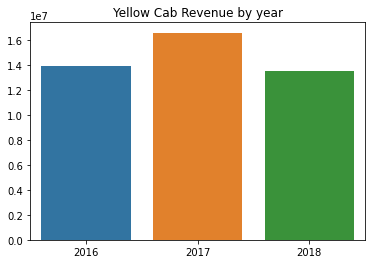

In [192]:
a = []
for i in range(3):
    a.append(round(sum(yellowTable.loc[yellowTable.Year == 2016+i]["Price Charged"]) - sum(yellowTable.loc[yellowTable.Year == 2016+i]["Cost of Trip"])))

sns.barplot(x=["2016","2017","2018"], y=a)
plt.title("Yellow Cab Revenue by year")

In [193]:
a

[13926995, 16575978, 13517400]

Text(0.5, 1.0, 'Pink Cab Revenue by year')

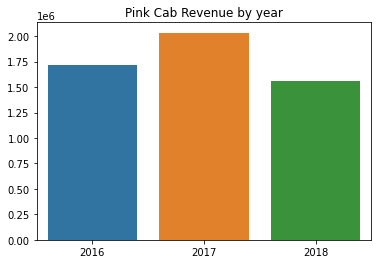

In [194]:
a = []
for i in range(3):
    a.append(round(sum(pinkTable.loc[pinkTable.Year == 2016+i]["Price Charged"]) - sum(pinkTable.loc[pinkTable.Year == 2016+i]["Cost of Trip"])))

sns.barplot(x=["2016","2017","2018"], y=a)
plt.title("Pink Cab Revenue by year")

In [195]:
a

[1713511, 2033655, 1560162]

MOST COMMON METHOD OF PAYMENT BY COMPANY

In [196]:
cashPercentage = round(len(yellowTable.loc[yellowTable.Payment_Mode == "Cash"])*100/len(yellowTable),2)
cardPercentage = round(len(yellowTable.loc[yellowTable.Payment_Mode == "Card"])*100/len(yellowTable),2)

print(f"Percentage of Cash use (Yellow Cab): {cashPercentage}")
print(f"Percentage of Card use (Yellow Cab): {cardPercentage}")

Percentage of Cash use (Yellow Cab): 40.01
Percentage of Card use (Yellow Cab): 59.99


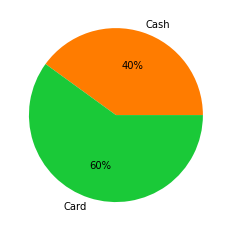

In [197]:
data = [cashPercentage,cardPercentage]
labels = ['Cash', 'Card']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [198]:
cashPercentage = round(len(pinkTable.loc[pinkTable.Payment_Mode == "Cash"])*100/len(pinkTable),2)
cardPercentage = round(len(pinkTable.loc[pinkTable.Payment_Mode == "Card"])*100/len(pinkTable),2)

print(f"Percentage of Cash use (Pink Cab): {cashPercentage}")
print(f"Percentage of Card use (Pink Cab): {cardPercentage}")

Percentage of Cash use (Pink Cab): 40.13
Percentage of Card use (Pink Cab): 59.87


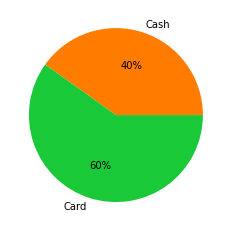

In [199]:
data = [cashPercentage,cardPercentage]
labels = ['Cash', 'Card']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

SEASONALITY OF DEMAND\
Is there any seasonality in number of customers using the cab service?

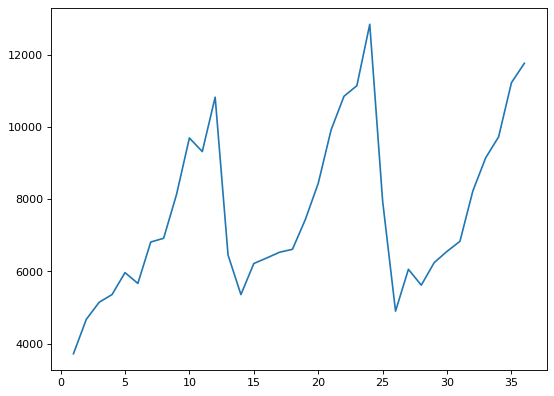

In [200]:
a = []
for i in range(3):
    for j in range(12):
        a.append(len(yellowTable.loc[(yellowTable.Year == 2016+i) & (yellowTable.Month == 1+j)]))
    
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(36)+1,a)

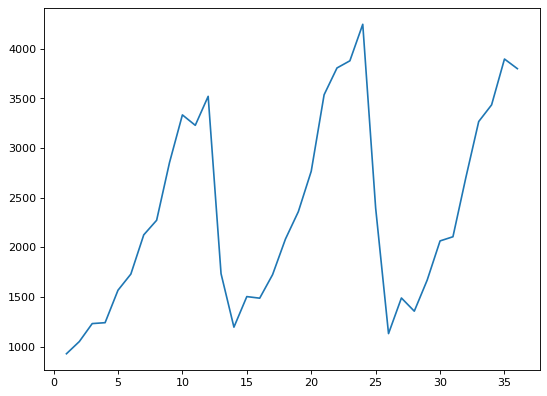

In [201]:
a = []
for i in range(3):
    for j in range(12):
        a.append(len(pinkTable.loc[(pinkTable.Year == 2016+i) & (pinkTable.Month == 1+j)]))

figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(36)+1,a)

We notice seasonality of demand, with large increase of demand towards the end of each year. (winter)

GENDER DISTRIBUTION BY COMPANY

In [202]:
malePercentage = round(len(yellowTable.loc[yellowTable.Gender == "Male"])*100/len(yellowTable),2)
femalePercentage = round(len(yellowTable.loc[yellowTable.Gender == "Female"])*100/len(yellowTable),2)

print(f"Percantage of Males (Yellow Cab): {malePercentage}")
print(f"Percantage of Females (Yellow Cab): {femalePercentage}")


Percantage of Males (Yellow Cab): 57.77
Percantage of Females (Yellow Cab): 42.23


In [203]:
malePercentage = round(len(pinkTable.loc[pinkTable.Gender == "Male"])*100/len(pinkTable),2)
femalePercentage = round(len(pinkTable.loc[pinkTable.Gender == "Female"])*100/len(pinkTable),2)

print(f"Percantage of Males (Yellow Cab): {malePercentage}")
print(f"Percantage of Females (Yellow Cab): {femalePercentage}")

Percantage of Males (Yellow Cab): 55.76
Percantage of Females (Yellow Cab): 44.24


WHAT ARE THE CORRELATED FEATURES?

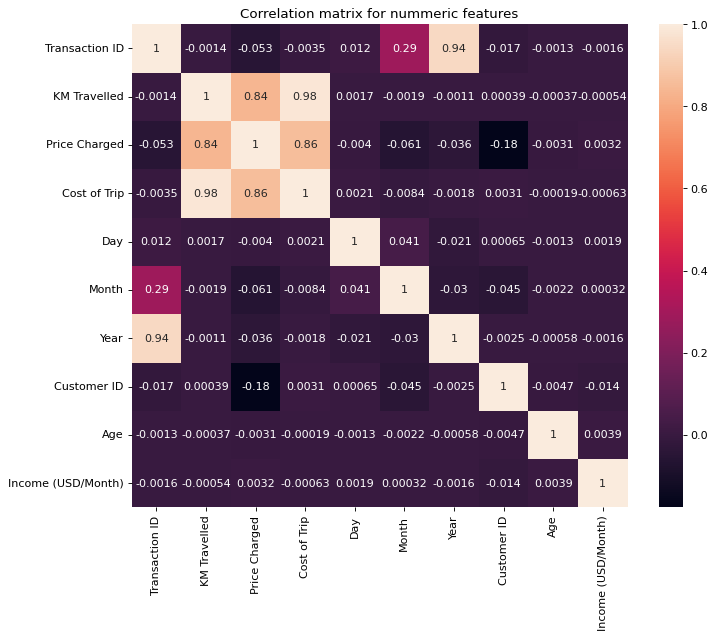

In [204]:
correlation_matrix = masterTable.corr(method='pearson')

figure(figsize=(10, 8), dpi=80)
sns.heatmap(correlation_matrix , annot=True)
plt.title("Correlation matrix for nummeric features")
plt.show()

Highest Correlation is between "KM Travelled" and "Cost of Trip"

IS THERE A CORRELATION BETWEEN GENDER AND DISTANCE TRAVELLED?

In [205]:
maleDistance = round(sum(masterTable.loc[masterTable.Gender == "Male"]["KM Travelled"]))
numberofMales = len(masterTable.loc[masterTable.Gender == "Male"])
ratioMale = round(maleDistance/numberofMales,2)
print(f"On average, a male will travel: {ratioMale}km")

On average, a male will travel: 22.55km


In [206]:
femaleDistance = round(sum(masterTable.loc[masterTable.Gender == "Female"]["KM Travelled"]))
numberoffemales = len(masterTable.loc[masterTable.Gender == "Female"])
ratiofemale = round(femaleDistance/numberoffemales,2)
print(f"On average, a female will travel: {ratiofemale}km")

On average, a female will travel: 22.59km


<AxesSubplot:>

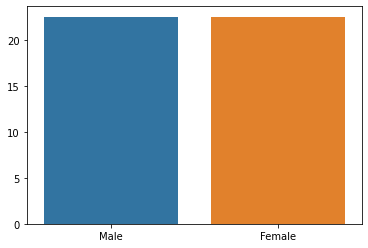

In [207]:
a = []
a.append(ratioMale)
a.append(ratiofemale)
sns.barplot(x=["Male","Female"], y=a)

Conclusion: There is no correlation between gender and distance travelled.

PERCENTAGE OF USERS BY CITY

In [208]:
sortedCity = city.sort_values(by=["Users"], ascending=False).reset_index(drop=True)
sortedCity.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,SAN FRANCISCO CA,629591,213609
2,CHICAGO IL,1955130,164468
3,LOS ANGELES CA,1595037,144132
4,WASHINGTON DC,418859,127001


In [209]:
pop = []
use = []
for i in range(5):
    pop.append(sortedCity.loc[i][1])
    use.append(sortedCity.loc[i][2])
pop.append(sum(sortedCity.loc[6:20].Population))
use.append(sum(sortedCity.loc[6:20].Users))


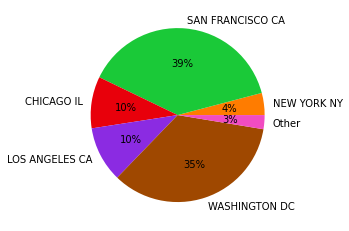

In [210]:
data = [round((i / j)*100,2) for i, j in zip(use, pop)]
labels = ['NEW YORK NY',
 'SAN FRANCISCO CA',
 'CHICAGO IL',
 'LOS ANGELES CA',
 'WASHINGTON DC',
 'Other']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:8]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

WHICH COMPANY MADE MORE PROFIT PER KM TRAVELLED IN 2018?

In [211]:
kmTravelled = round(sum(yellowTable.loc[yellowTable.Year == 2018]["KM Travelled"]))

In [212]:
charge = round(sum(yellowTable.loc[yellowTable.Year == 2018]["Price Charged"]))
cost = round(sum(yellowTable.loc[yellowTable.Year == 2018]["Cost of Trip"]))

rev = charge - cost
print(f"Yellow Cab makes {round(rev/kmTravelled,2)} dollars per km travelled!")

Yellow Cab makes 6.36 dollars per km travelled!


In [213]:
kmTravelled = round(sum(pinkTable.loc[pinkTable.Year == 2018]["KM Travelled"]))

In [214]:
charge = round(sum(pinkTable.loc[pinkTable.Year == 2018]["Price Charged"]))
cost = round(sum(pinkTable.loc[pinkTable.Year == 2018]["Cost of Trip"]))

rev = charge - cost
print(f"Pink Cab makes {round(rev/kmTravelled,2)} dollars per km travelled!")

Pink Cab makes 2.36 dollars per km travelled!


We have evaluated both companies on the following points:

- Profit of Previous 3 years: Yellow cab has made around 9 times more profit than Pink Cab did during the period of 2016-2018
- Profit by Year: We observed a decline in profit in both companies, nevertheless, Yellow Cab still has a much higher profit percentage each year averaging around 34.6% profit, while Pink Cab only averages 18.97%.
- Average Profit Per KM: Yellow Cab profits almost 3 times more than Pink Cab does in each km traveled
- Profit Gender Wise: Males contribute the most to both companies profits and at around the same percentage.
- Profit based on income: By analyzing the data, we observed that customers, in both companies, belong to similar social class. We also notice that both companies make the most profit off of customers with higher income (>15 000).
- Seasonality in the demand: We noticed that the demand spikes during winter in both companies.
- Cab Market is most popular in San Francisco

Based on those points, we recommend the investment in Yellow Cab.